### Disney recommendation modelling

Disney+ is another one of the most popular media and video streaming platforms. They have close to 1300 movies or tv shows available on their platform, as of mid-2021, they have over 116M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Disney+, along with details such as - show_id, type, title, country, cast, date_added, directors, ratings, release year and duration.


**Dataset Info -** The Dataset contains 1,535 rows and 15 columns, 1 ID Column and others described below.

- **id**: The title ID on JustWatch
- **title**: The name of the title
- **show_type**: TV show or movie
- **description**: A brief description
- **release_year**: The release year
- **age_certification**: The age certification
- **runtime**: The length of the episode (SHOW) or movie
- **genres**: A list of genres
- **production_countries**: A list of countries that produced the title
- **seasons**: Number of seasons if it's a SHOW
- **imdb_id**: The title ID on IMDB
- **imdb_score**: Score on IMDB
- **imdb_votes**: Votes on IMDB
- **tmdb_popularity**: Popularity on TMDB
- **tmdb_score**: Score on TMDB



- **Goal**

The goal of this project is to develop a recommendation system for Disney Plus, enhancing user experience by efficiently helping them discover new shows and movies of their interest. Currently, users may struggle to find content that matches their personal preferences due to the extensive library available. An effective recommendation system can not only increase user engagement but also improve overall satisfaction by facilitating personalized discovery of relevant content.

- **ML Problem Statement**

The associated ML problem is to develop a recommendation model capable of analyzing the viewing history and preferences of Disney Plus users to predict and recommend new shows and movies they are likely to enjoy. This is a collaborative filtering-based item recommendation problem aimed at delivering accurate and relevant recommendations to enhance user discovery experience on the streaming service.

## Importing the libraries :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import lets_plot as lp
from sklearn.preprocessing import LabelEncoder

## Loading the dataset :

In [2]:
file_path = r'C:\Users\Bianca\Documents\GitHub\disney_recommendation\titles.csv'
disney_plus_edw = pd.read_csv(file_path)

## Exploratory Data Wrangling (EDW)

In [3]:
disney_plus_edw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1535 entries, 0 to 1534
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1535 non-null   object 
 1   title                 1535 non-null   object 
 2   type                  1535 non-null   object 
 3   description           1529 non-null   object 
 4   release_year          1535 non-null   int64  
 5   age_certification     1210 non-null   object 
 6   runtime               1535 non-null   int64  
 7   genres                1535 non-null   object 
 8   production_countries  1535 non-null   object 
 9   seasons               415 non-null    float64
 10  imdb_id               1133 non-null   object 
 11  imdb_score            1108 non-null   float64
 12  imdb_votes            1105 non-null   float64
 13  tmdb_popularity       1524 non-null   float64
 14  tmdb_score            1426 non-null   float64
dtypes: float64(5), int64(

In [4]:
disney_plus_edw.head(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1940,G,120,"['animation', 'family', 'music', 'fantasy']",['US'],NaN,tt0032455,7.7,94681.0,57.751,7.4
1,tm67803,Snow White and the Seven Dwarfs,MOVIE,"A beautiful girl, Snow White, takes refuge in ...",1937,G,83,"['fantasy', 'family', 'romance', 'animation', ...",['US'],NaN,tt0029583,7.6,195321.0,107.137,7.1
2,tm82546,Pinocchio,MOVIE,Lonely toymaker Geppetto has his wishes answer...,1940,G,88,"['animation', 'comedy', 'family', 'fantasy']",['US'],NaN,tt0032910,7.5,141937.0,71.160,7.1
3,tm79357,Bambi,MOVIE,Bambi's tale unfolds from season to season as ...,1942,G,70,"['animation', 'drama', 'family']",['US'],NaN,tt0034492,7.3,140406.0,68.136,7.0
4,tm62671,Treasure Island,MOVIE,Enchanted by the idea of locating treasure bur...,1950,PG,96,"['family', 'action']","['GB', 'US']",NaN,tt0043067,6.9,8229.0,10.698,6.5
5,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1949,G,68,"['fantasy', 'horror', 'animation', 'comedy', '...",['US'],NaN,tt0041094,6.9,15405.0,10.862,6.5
6,tm61052,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950,G,74,"['fantasy', 'animation', 'family', 'romance']",['US'],NaN,tt0042332,7.3,157099.0,144.284,7.0
7,tm87946,Dumbo,MOVIE,Dumbo is a baby elephant born with over-sized ...,1941,G,63,"['animation', 'drama', 'family', 'fantasy']",['US'],NaN,tt0033563,7.2,129548.0,69.875,7.0
8,tm4623,The Three Caballeros,MOVIE,For Donald's birthday he receives a box with t...,1944,G,71,"['animation', 'comedy', 'family', 'fantasy']",['US'],NaN,tt0038166,6.3,13889.0,11.750,6.4
9,tm77826,The Reluctant Dragon,MOVIE,Humorist Robert Benchley attempts to find Walt...,1941,G,74,"['fantasy', 'animation', 'family', 'comedy']",['US'],NaN,tt0034091,6.8,3280.0,6.958,6.6


In [5]:
disney_plus_edw.nunique() # Count unique rows in the dataset.

id                      1535
title                   1500
type                       2
description             1528
release_year              91
age_certification          9
runtime                  157
genres                   621
production_countries      70
seasons                   15
imdb_id                 1133
imdb_score                66
imdb_votes              1003
tmdb_popularity         1445
tmdb_score                62
dtype: int64

In [6]:
disney_plus_edw = disney_plus_edw.drop_duplicates(subset=['title']) ## Remove title duplicates

In [7]:
disney_plus_edw.nunique() # Count unique rows in the dataset.

id                      1500
title                   1500
type                       2
description             1494
release_year              91
age_certification          9
runtime                  157
genres                   600
production_countries      68
seasons                   15
imdb_id                 1099
imdb_score                65
imdb_votes               971
tmdb_popularity         1411
tmdb_score                62
dtype: int64

In [8]:
disney_plus_edw.isnull().sum() # Count null rows in the dataset.

id                         0
title                      0
type                       0
description                6
release_year               0
age_certification        324
runtime                    0
genres                     0
production_countries       0
seasons                 1093
imdb_id                  401
imdb_score               426
imdb_votes               429
tmdb_popularity           11
tmdb_score               109
dtype: int64

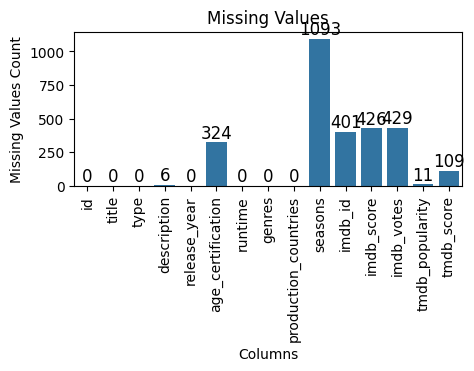

In [9]:
missing_values_count = disney_plus_edw.isnull().sum()

# Configura o tamanho da figura
plt.figure(figsize=(5, 2))

# Cria o gráfico de barras
sns.barplot(x=missing_values_count.index, y=missing_values_count)

# Adiciona título ao gráfico
plt.title("Missing Values")

# Configurações adicionais para o eixo x, eixo y e rotação dos rótulos no eixo x
plt.xlabel("Columns")
plt.ylabel("Missing Values Count")
plt.xticks(rotation=90)

# Adiciona os valores numéricos acima das barras
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 2,
            int(height), fontsize=12, ha='center', va='bottom')

# Exibe o gráfico
plt.show()

In [10]:
disney_plus_edw['seasons'] = disney_plus_edw['seasons'].fillna(0)
disney_plus_edw['tmdb_score'] = disney_plus_edw['tmdb_score'].fillna(0)
disney_plus_edw['tmdb_popularity'] = disney_plus_edw['tmdb_popularity'].fillna(0)

In [11]:
disney_plus_edw = disney_plus_edw.dropna(subset=['description']) # Remove rows NULL

In [12]:
disney_plus_edw = disney_plus_edw.drop(columns=['imdb_score','imdb_votes','imdb_id']) # remove columns with missing values outliers

In [13]:
disney_plus_edw.isnull().sum() # Count null rows in the dataset.

id                        0
title                     0
type                      0
description               0
release_year              0
age_certification       319
runtime                   0
genres                    0
production_countries      0
seasons                   0
tmdb_popularity           0
tmdb_score                0
dtype: int64

In [14]:
nan_age_certification = disney_plus_edw[disney_plus_edw['age_certification'].isna()]

# Exibir o resultado
nan_age_certification.head(350)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,tmdb_popularity,tmdb_score
12,tm77407,Saludos Amigos,MOVIE,Live-action segments show members of the Disne...,1942,NaN,42,"['animation', 'fantasy', 'comedy', 'family']",['US'],0.0,20.418,5.8
13,tm71205,How to Play Baseball,MOVIE,Goofy shows us the national pastime. After a b...,1942,NaN,8,"['comedy', 'animation']",['US'],0.0,4.179,6.6
14,tm5822,Melody Time,MOVIE,In the grand tradition of Disney's great music...,1948,NaN,75,"['comedy', 'music', 'family', 'animation']",['US'],0.0,8.856,6.2
16,tm134279,Three Little Pigs,MOVIE,The two pigs building houses of hay and sticks...,1933,NaN,8,['comedy'],['US'],0.0,8.883,6.8
17,tm74410,Tugboat Mickey,MOVIE,Mickey is performing routine maintenance on hi...,1940,NaN,7,"['animation', 'family', 'comedy']",['US'],0.0,5.845,6.2
...,...,...,...,...,...,...,...,...,...,...,...,...
1515,tm1035015,Dinner Is Served,MOVIE,A Chinese student at an elite U.S. boarding sc...,2021,NaN,21,['drama'],['US'],0.0,2.403,5.9
1517,tm1034999,Growing Fangs,MOVIE,"Val Garcia, a Mexican-American teen who is hal...",2021,NaN,19,['drama'],['US'],0.0,14.198,6.8
1518,tm1074538,Disney Princess Remixed: An Ultimate Princess ...,MOVIE,A music special celebrating the empowering att...,2021,NaN,22,"['music', 'documentation', 'fantasy']",['US'],0.0,6.381,5.5
1524,ts288962,Turning the Tables with Robin Roberts,SHOW,Get personal with Robin Roberts and some of Ho...,2021,NaN,27,[],['US'],1.0,1.955,0.0


In [15]:
# Filtrar e visualizar todas as linhas onde a coluna 'column_name' tem strings vazias
empty_strings_in_column = disney_plus_edw[disney_plus_edw['genres'] == '[]']

# Exibir o resultado
empty_strings_in_column.head(20)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,tmdb_popularity,tmdb_score
135,tm7719,The Prince and the Pauper,MOVIE,"In the London of 1537, two boys resembling eac...",1962,NaN,93,[],['US'],0.0,6.390,7.7
259,tm117853,Casebusters,MOVIE,Jamie and Allie are amateur sleuths whose gran...,1986,G,47,[],['US'],0.0,1.952,5.7
834,tm143057,The Day the Series Stopped,MOVIE,"On Oct. 17, 1989, at 5:04 p.m. PT, soon after ...",2014,NaN,51,[],['US'],0.0,2.114,7.0
1006,ts80444,Nature Boom Time,SHOW,"Follow Charlie, Kirby, and Patrick as they tra...",2016,NaN,6,[],['US'],1.0,2.405,0.0
1009,tm833134,World's Greatest Dogs,MOVIE,"Athletic, playful and loving, our canine compa...",2015,NaN,43,[],[],0.0,0.885,0.0
1013,ts237993,The Book of Once Upon a Time,SHOW,Classic Disney tales from 'The Book of Once Up...,2015,TV-G,4,[],['US'],4.0,0.606,0.0
1085,ts237940,Avengers: Secret Wars (Shorts),SHOW,"With Tony Stark trapped in another dimension, ...",2017,NaN,4,[],[],1.0,0.603,0.0
1105,ts254161,Scuba Sam's World,SHOW,Take a deep dive and learn all about the belov...,2018,NaN,2,[],['US'],1.0,0.600,0.0
1125,ts254331,"Weirdest, Bestest, Truest",SHOW,Siblings Kirby and Charlie share strange disco...,2018,TV-G,2,[],['US'],1.0,0.857,0.0
1130,ts80441,Awesome Animals,SHOW,The National Geographic Kids channel is an exc...,2017,NaN,25,[],['US'],1.0,1.720,0.0


In [16]:
# Limpeza dos dados de gênero
disney_plus_edw['genres'] = disney_plus_edw['genres'].str.replace("[", "").str.replace("]", "")
disney_plus_edw['genre'] = disney_plus_edw['genres'].str.split(',').str[0].str.strip()

# Limpeza dos dados de países de produção
disney_plus_edw['production_countries'] = disney_plus_edw["production_countries"].str.replace("[","").str.replace("]","")
disney_plus_edw['production_country'] = disney_plus_edw['production_countries'].str.split(',').str[0]

# Remover colunas originais
disney_plus_edw.drop(['genres', 'production_countries'], axis=1, inplace=True)

#Remover '' 
disney_plus_edw['genre'] = disney_plus_edw['genre'].str.replace("'", "", regex=False).str.strip()
disney_plus_edw['production_country'] = disney_plus_edw['production_country'].str.replace("'", "", regex=False).str.strip()

In [17]:
print(disney_plus_edw['genre'].unique())

['animation' 'fantasy' 'family' 'comedy' 'action' 'documentation'
 'thriller' 'romance' 'scifi' 'music' 'western' 'drama' '' 'crime'
 'horror' 'history' 'reality' 'war']


In [18]:
# Identificar linhas com strings vazias na coluna 'genres'
empty_genres = disney_plus_edw[disney_plus_edw['genre'] == ''].index

# Identificar linhas com strings vazias na coluna 'production_country'
empty_production_country = disney_plus_edw[disney_plus_edw['production_country'] == ''].index

# Verificar se essas linhas são as mesmas
same_lines = empty_genres.isin(empty_production_country)

# Contar o número de linhas vazias que são comuns em ambas as colunas
num_common_empty_lines = same_lines.sum()

print(f"Number of common empty strings in 'genres' and 'production_country': {num_common_empty_lines}")

# Se você também quiser verificar as linhas diferentes
num_unique_empty_genres = len(empty_genres) - num_common_empty_lines
num_unique_empty_production_country = len(empty_production_country) - num_common_empty_lines

print(f"Number of unique empty strings in 'genres': {num_unique_empty_genres}")
print(f"Number of unique empty strings in 'production_country': {num_unique_empty_production_country}")


Number of common empty strings in 'genres' and 'production_country': 4
Number of unique empty strings in 'genres': 23
Number of unique empty strings in 'production_country': 40


In [19]:
# Remover linhas com valores vazios em 'genres' e 'production_country'
disney_plus_edw_cleaned = disney_plus_edw.dropna(subset=['genre', 'production_country'])

# Opcionalmente, remover linhas com strings vazias (se necessário)
disney_plus_edw_cleaned = disney_plus_edw_cleaned[(disney_plus_edw_cleaned['genre'] != '') & 
                                                  (disney_plus_edw_cleaned['production_country'] != '')]

print(f"Number of rows after cleaning: {disney_plus_edw_cleaned.shape[0]}")

Number of rows after cleaning: 1427


In [20]:
disney_plus_edw_cleaned.isnull().sum() # Count null rows in the dataset.

id                      0
title                   0
type                    0
description             0
release_year            0
age_certification     280
runtime                 0
seasons                 0
tmdb_popularity         0
tmdb_score              0
genre                   0
production_country      0
dtype: int64

In [21]:
# Identificar linhas com strings vazias na coluna 'genres'
empty_genres = disney_plus_edw[disney_plus_edw['genre'] == ''].index

# Identificar linhas com strings vazias na coluna 'production_country'
empty_production_country = disney_plus_edw[disney_plus_edw['production_country'] == ''].index

# Verificar se essas linhas são as mesmas
same_lines = empty_genres.isin(empty_production_country)

# Contar o número de linhas vazias que são comuns em ambas as colunas
num_common_empty_lines = same_lines.sum()

print(f"Number of common empty strings in 'genres' and 'production_country': {num_common_empty_lines}")

# Se você também quiser verificar as linhas diferentes
num_unique_empty_genres = len(empty_genres) - num_common_empty_lines
num_unique_empty_production_country = len(empty_production_country) - num_common_empty_lines

print(f"Number of unique empty strings in 'genres': {num_unique_empty_genres}")
print(f"Number of unique empty strings in 'production_country': {num_unique_empty_production_country}")


Number of common empty strings in 'genres' and 'production_country': 4
Number of unique empty strings in 'genres': 23
Number of unique empty strings in 'production_country': 40


In [22]:
# Criar uma cópia do DataFrame
df_encoded = disney_plus_edw.copy()

# Codificar colunas categóricas
label_encoders = {}
for column in ['type', 'genre', 'production_country']:
    if df_encoded[column].dtype == 'object':
        le = LabelEncoder()
        df_encoded[column] = df_encoded[column].astype(str)  # Garantir que os dados são string
        df_encoded[column] = le.fit_transform(df_encoded[column])
        label_encoders[column] = le

# Preencher valores NaN na coluna 'age_certification'
if 'age_certification' in df_encoded.columns:
    moda_age_certification = df_encoded['age_certification'].mode()[0]
    df_encoded['age_certification'].fillna(moda_age_certification, inplace=True)

    # Converter 'age_certification' para numérico se necessário
    if df_encoded['age_certification'].dtype == 'object':
        le = LabelEncoder()
        df_encoded['age_certification'] = le.fit_transform(df_encoded['age_certification'])

# Recalcular a correlação
numeric_df = df_encoded.select_dtypes(include=[float, int])
correlation_matrix = numeric_df.corr()

# Verificar a correlação com a coluna 'age_certification'
print(correlation_matrix['age_certification'])


type                  0.787693
release_year          0.269442
age_certification     1.000000
runtime              -0.312253
seasons               0.504168
tmdb_popularity       0.022391
tmdb_score            0.109409
genre                 0.040902
production_country    0.074960
Name: age_certification, dtype: float64


C:\Users\Bianca\AppData\Local\Temp\ipykernel_10876\1186930654.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_encoded['age_certification'].fillna(moda_age_certification, inplace=True)


In [23]:
# Criar uma cópia do DataFrame para evitar alterações no original
df_encoded = disney_plus_edw.copy()

# Verificar a moda de 'age_certification' para cada tipo
mode_by_type = df_encoded.groupby('type')['age_certification'].agg(pd.Series.mode)

# Função para preencher valores nulos com base no tipo
def preencher_nulos(row):
    if pd.isna(row['age_certification']):
        tipo = row['type']
        if tipo in mode_by_type.index:
            return mode_by_type[tipo]
    return row['age_certification']

# Aplicar a função para preencher os valores nulos
df_encoded['age_certification'] = df_encoded.apply(preencher_nulos, axis=1)

# Verificar novamente os valores NaN
print(df_encoded['age_certification'].isna().sum())


0


In [24]:
# Criar uma cópia do DataFrame
df_encoded = disney_plus_edw.copy()

# Verificar e preencher valores NaN em 'age_certification'
moda_age_certification = df_encoded['age_certification'].mode()
if not moda_age_certification.empty:
    moda_age_certification = moda_age_certification[0]
    df_encoded['age_certification'].fillna(moda_age_certification, inplace=True)

# Verificar a presença da coluna 'age_certification'
print("Colunas do DataFrame:", df_encoded.columns)
print("Tipos de dados das colunas:", df_encoded.dtypes)

# Converter 'age_certification' para numérico se necessário
if df_encoded['age_certification'].dtype == 'object':
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    df_encoded['age_certification'] = le.fit_transform(df_encoded['age_certification'])

# Filtrar apenas colunas numéricas
numeric_df = df_encoded.select_dtypes(include=[float, int])

# Recalcular a correlação
correlation_matrix = numeric_df.corr()

# Verificar a correlação com a coluna 'age_certification'
if 'age_certification' in correlation_matrix.columns:
    print(correlation_matrix['age_certification'])
else:
    print("Coluna 'age_certification' não encontrada na matriz de correlação.")


Colunas do DataFrame: Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'seasons', 'tmdb_popularity',
       'tmdb_score', 'genre', 'production_country'],
      dtype='object')
Tipos de dados das colunas: id                     object
title                  object
type                   object
description            object
release_year            int64
age_certification      object
runtime                 int64
seasons               float64
tmdb_popularity       float64
tmdb_score            float64
genre                  object
production_country     object
dtype: object
release_year         0.269442
age_certification    1.000000
runtime             -0.312253
seasons              0.504168
tmdb_popularity      0.022391
tmdb_score           0.109409
Name: age_certification, dtype: float64


C:\Users\Bianca\AppData\Local\Temp\ipykernel_10876\3086992352.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_encoded['age_certification'].fillna(moda_age_certification, inplace=True)


In [25]:
# Verificar a quantidade de valores nulos em cada coluna
print( df_encoded.isna().sum())

id                    0
title                 0
type                  0
description           0
release_year          0
age_certification     0
runtime               0
seasons               0
tmdb_popularity       0
tmdb_score            0
genre                 0
production_country    0
dtype: int64


In [26]:
## Exploratory Data Analysis (EDA)

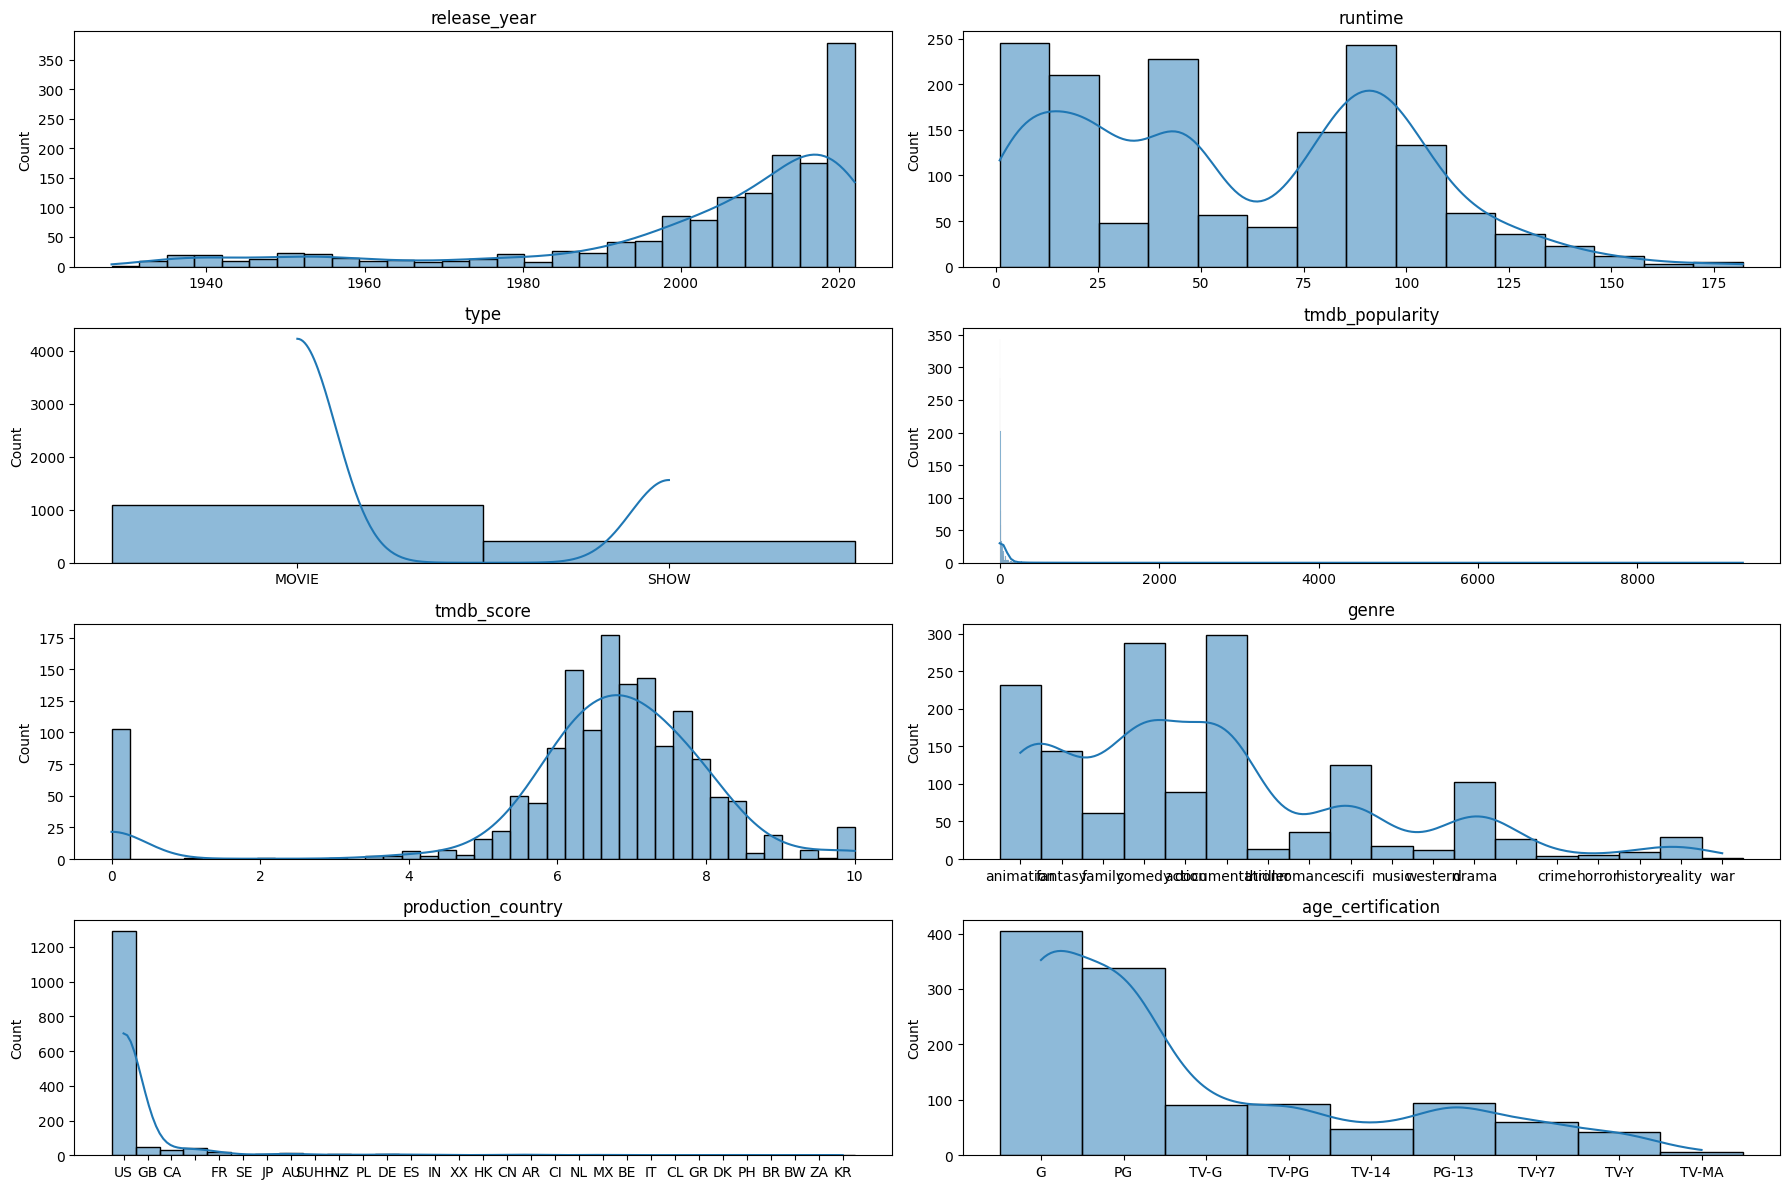

In [27]:
variables = ['release_year', 'runtime', 'type', 'tmdb_popularity', 'tmdb_score','genre','production_country','age_certification']

columns = 2
rows = 4
fig, axes = plt.subplots(rows, columns, figsize=(18, 12))

for current_idx, variable in enumerate(variables):
    i = current_idx // columns
    j = current_idx % columns
    sns.histplot(disney_plus_edw[variable], ax=axes[i][j], kde=True)
    axes[i][j].set_title(variable)
    axes[i][j].set_xlabel("")

plt.tight_layout()
plt.show()

# Estatísticas descritivas

In [28]:
disney_plus_edw.describe()

,release_year,runtime,seasons,tmdb_popularity,tmdb_score
count,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000
mean,2003.380857,59.753681,0.700134,39.750725,6.440094
std,21.846268,39.769592,1.956263,265.616753,2.012275
min,1928.000000,1.000000,0.000000,0.000000,0.000000
25%,1999.000000,23.000000,0.000000,3.806750,6.100000
50%,2011.000000,52.000000,0.000000,9.182000,6.800000
75%,2019.000000,92.000000,1.000000,24.002000,7.500000
max,2022.000000,182.000000,34.000000,9323.832000,10.000000


## Categóricas

In [29]:
disney_plus_edw.describe(include = [object])

,id,title,type,description,age_certification,genre,production_country
count,1494,1494,1494,1494,1175,1494,1494
unique,1494,1494,2,1494,9,18,31
top,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,G,documentation,US
freq,1,1,1091,1,404,298,1289


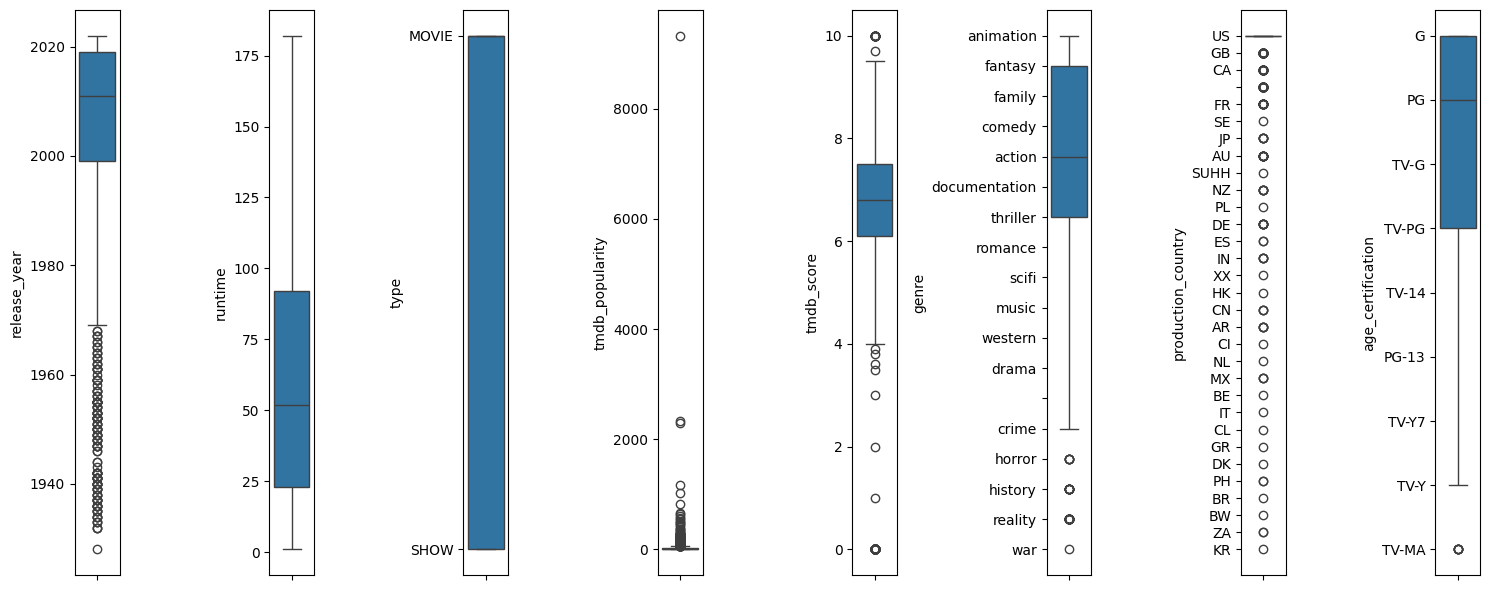

: 

In [30]:
variables = ['release_year', 'runtime', 'type', 'tmdb_popularity', 'tmdb_score','genre','production_country','age_certification']

fig, axes = plt.subplots(1, len(variables), figsize=(15,6))

for ax, variable in zip(axes, variables):
    ax = sns.boxplot( y=variable, data=disney_plus_edw, ax = ax)
plt.tight_layout()